In [12]:
import os
import re
import subprocess
import numpy as np

rps = 7.55
service_time = 0.0084
cold_start_time = 0.010
slo = 0.0293

run_matrix_method = [
    f"python", "matrix_method.py",
    f"--rps", f"{rps}",
    f"--service-time", f"{service_time}",
    f"--cold-start-time", f"{cold_start_time}",
]

perfs = []

for live_time in [1, 2, 3, 4, 5, 6, 7, 8]:
    for hite_rate in [i / 12 for i in range(13)]:
        _run_matrix_method = run_matrix_method + [
            f"--live-time", f"{live_time}",
            f"--hite-rate", f"{hite_rate}"
        ]
        # print(_run_matrix_method)
        proc = subprocess.run(_run_matrix_method, capture_output=True)
        # print(proc)
        output = proc.stdout.decode('utf-8')
        match = re.search(r'P\(slo\) = ([0-9.]+)', output)
        if match:
            slo = float(match.group(1))
            perfs.append((live_time, hite_rate, slo))
        else:
            print(f"Failed: live_time={live_time}, hite_rate={hite_rate}")
            print(proc.stderr.decode('utf-8'))
            raise Exception("Failed")

print(perfs)




[(1, 0.0, 0.8539158953916663), (1, 0.08333333333333333, 0.8539158953916663), (1, 0.16666666666666666, 0.8643968271854914), (1, 0.25, 0.8748798300869783), (1, 0.3333333333333333, 0.8853649047100869), (1, 0.4166666666666667, 0.8958520516690187), (1, 0.5, 0.9063412715782191), (1, 0.5833333333333334, 0.9168325650523761), (1, 0.6666666666666666, 0.9273259327064203), (1, 0.75, 0.9378213751555249), (1, 0.8333333333333334, 0.9483188930151087), (1, 0.9166666666666666, 0.9588184869008312), (1, 1.0, 0.9693201574285973), (2, 0.0, 0.8661585935497582), (2, 0.08333333333333333, 0.8661585935497582), (2, 0.16666666666666666, 0.875528635321334), (2, 0.25, 0.8849003322197159), (2, 0.3333333333333333, 0.8942736846834854), (2, 0.4166666666666667, 0.9036486931513795), (2, 0.5, 0.9130253580622908), (2, 0.5833333333333334, 0.922403679855265), (2, 0.6666666666666666, 0.9317836589695045), (2, 0.75, 0.9411652958443675), (2, 0.8333333333333334, 0.9505485909193657), (2, 0.9166666666666666, 0.9599335446341678), (2,

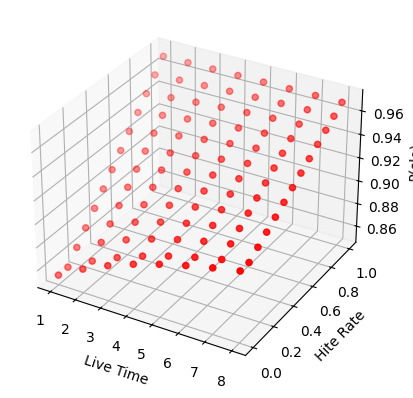

In [14]:
import matplotlib.pyplot as plt

live_times = [perf[0] for perf in perfs]
hite_rates = [perf[1] for perf in perfs]
slos = [perf[2] for perf in perfs]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(live_times, hite_rates, slos, c='r', marker='o')

ax.set_xlabel('Live Time')
ax.set_ylabel('Hite Rate')
ax.set_zlabel('P(slo)')

plt.show()

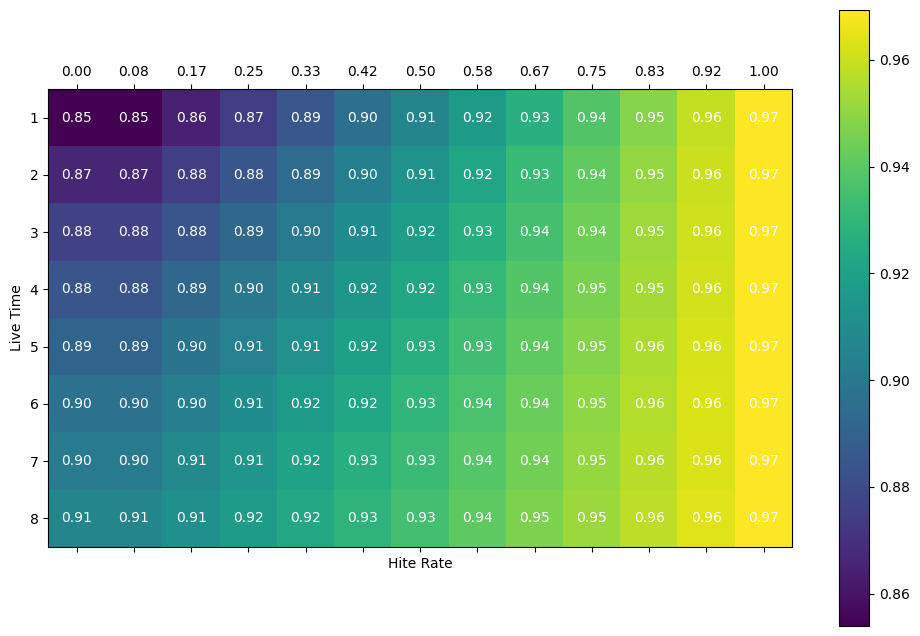

In [15]:
# Create a 2D matrix from perfs
hite_rates_unique = sorted(list(set(hite_rates)))
live_times_unique = sorted(list(set(live_times)))
matrix = np.zeros((max(live_times), len(hite_rates_unique)))

for lt, hr, slo in perfs:
    lt_index = live_times_unique.index(lt)
    hr_index = hite_rates_unique.index(hr)
    matrix[lt_index, hr_index] = slo

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
cax = ax.matshow(matrix, cmap='viridis')

# Write value number in each matrix cell
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        c = matrix[i, j]
        ax.text(j, i, f'{c:.2f}', va='center', ha='center', color='white')

ax.set_xlabel('Hite Rate')
ax.set_ylabel('Live Time')
ax.set_xticks(np.arange(len(hite_rates_unique)))
ax.set_yticks(np.arange(len(live_times_unique)))
ax.set_xticklabels([f'{hr:.2f}' for hr in hite_rates_unique])
ax.set_yticklabels([f'{lt}' for lt in live_times_unique])


fig.colorbar(cax)
plt.show()

